# **Title: Analyzing the Impact of Online Advertising on User Engagement**

In this analysis we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

### Dataset description:



This dataset contains the following features:

- 'Daily Time Spent on Site': consumer time on site in minutes

- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad


### Importing the necessary libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [18]:
# Load the dataset
df = pd.read_csv('study_performance.csv')

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
# Check for missing values
print(data.isnull().sum())

# Check the data types
print(data.dtypes)

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploratory Data Analysis

### Pairplot to visualize relationships between numeric variables

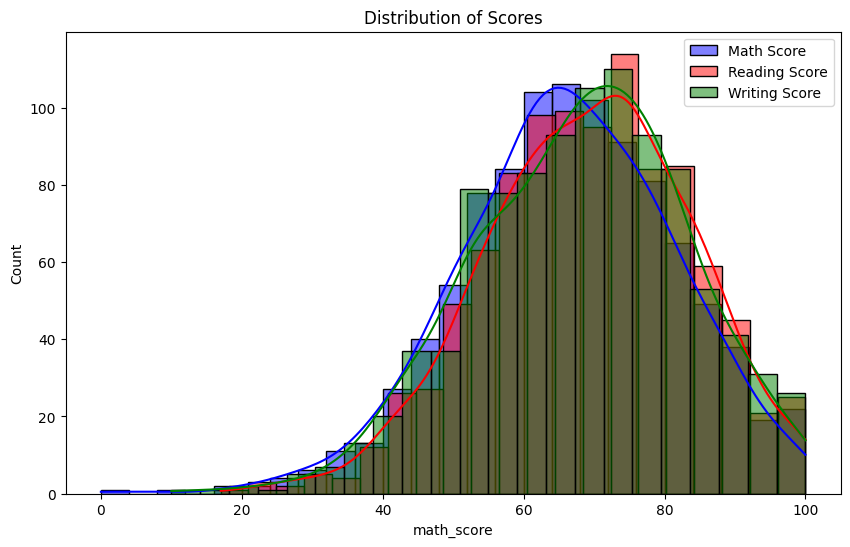

In [23]:
# Distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(data['scores'], kde=True, color='blue', label='Math Score')
sns.histplot(data['reading_score'], kde=True, color='red', label='Reading Score')
sns.histplot(data['writing_score'], kde=True, color='green', label='Writing Score')
plt.legend()
plt.title('Distribution of Scores')
plt.show()

### Boxplot to visualize the distribution of 'Age' by 'Clicked on Ad'

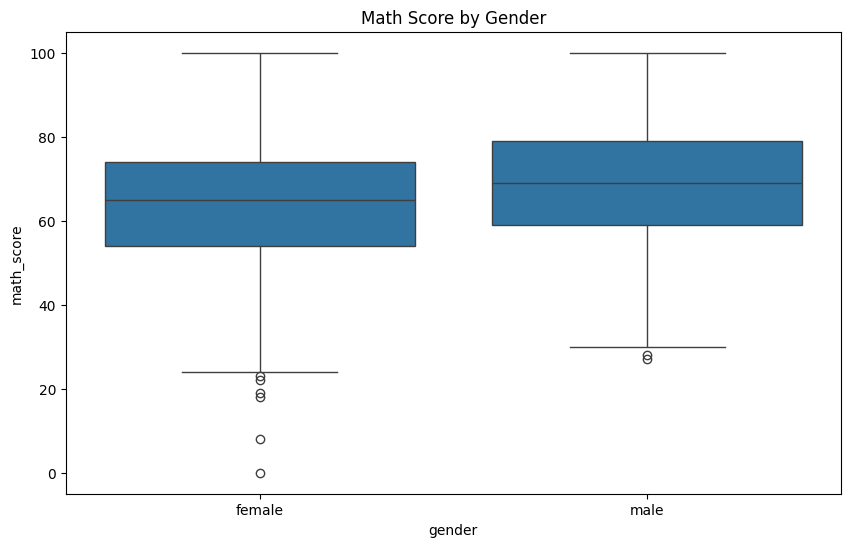

In [24]:
# Box plots for categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math_score', data=data)
plt.title('Math Score by Gender')
plt.show()

### Countplot to visualize the distribution of 'Male' by 'Clicked on Ad'

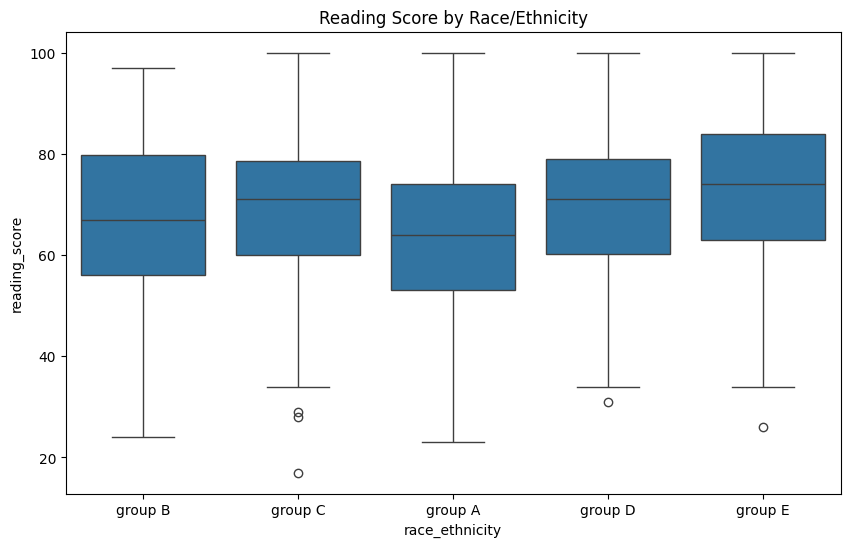

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='race_ethnicity', y='reading_score', data=data)
plt.title('Reading Score by Race/Ethnicity')
plt.show()

### Barplot to visualize the average 'Daily Time Spent on Site' by 'Clicked on Ad'

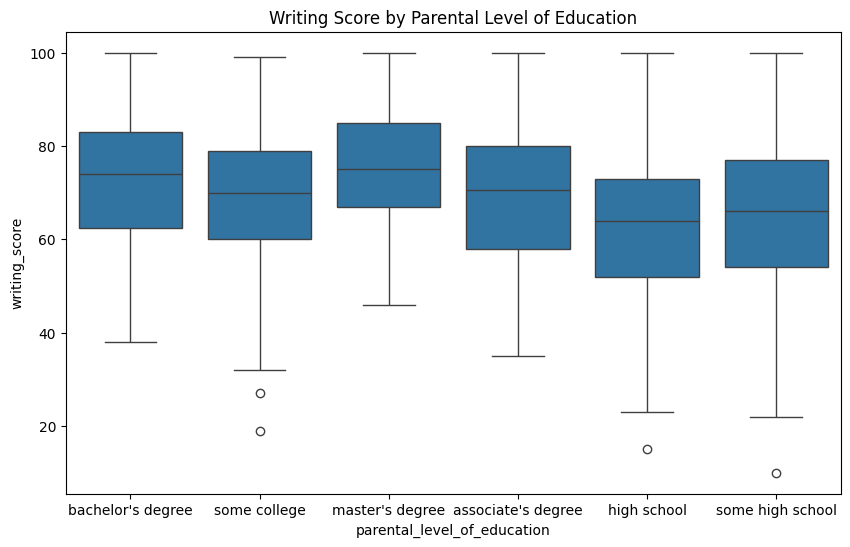

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='writing_score', data=data)
plt.title('Writing Score by Parental Level of Education')
plt.show()

In [28]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Define predictor variables and outcome variable for math score
X_math = data.drop(['math_score', 'reading_score', 'writing_score'], axis=1)
y_math = data['math_score']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model_math = LinearRegression()

# Fit the model
model_math.fit(X_train_math, y_train_math)

# Predict on the test set
y_math_pred = model_math.predict(X_test_math)

# Evaluate the model
mse_math = mean_squared_error(y_test_math, y_math_pred)
r2_math = r2_score(y_test_math, y_math_pred)

print("Math Score Regression Results")
print("Mean Squared Error:", mse_math)
print("R2 Score:", r2_math)


Math Score Regression Results
Mean Squared Error: 200.51084564367306
R2 Score: 0.17599998338251155


In [30]:
# Print the coefficients
coefficients_math = pd.DataFrame(model_math.coef_, X_math.columns, columns=['Coefficient'])
print("Math Score Coefficients:")
print(coefficients_math)

# Interpretation
print("\nInterpretation of Coefficients:")
for index, row in coefficients_math.iterrows():
    print(f"{index}: {row['Coefficient']:.4f}")


Math Score Coefficients:
                                               Coefficient
gender_male                                       4.520714
race_ethnicity_group B                            0.182362
race_ethnicity_group C                            0.602873
race_ethnicity_group D                            3.612132
race_ethnicity_group E                            9.077935
parental_level_of_education_bachelor's degree     3.119051
parental_level_of_education_high school          -4.090503
parental_level_of_education_master's degree       1.074605
parental_level_of_education_some college         -0.145008
parental_level_of_education_some high school     -2.896392
lunch_standard                                   11.523997
test_preparation_course_none                     -5.874513

Interpretation of Coefficients:
gender_male: 4.5207
race_ethnicity_group B: 0.1824
race_ethnicity_group C: 0.6029
race_ethnicity_group D: 3.6121
race_ethnicity_group E: 9.0779
parental_level_of_education_bac

In [32]:
# Define the predictor variables and the target variable for logistic regression
X_logistic = data.drop(['math_score', 'reading_score', 'writing_score', 'test_preparation_course_none'], axis=1)
y_logistic = data['test_preparation_course_none']

# Split the data into training and testing sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the Logistic Regression model
model_logistic = LogisticRegression(max_iter=1000)

# Fit the model
model_logistic.fit(X_train_logistic, y_train_logistic)

# Predict on the test set
y_logistic_pred = model_logistic.predict(X_test_logistic)

# Evaluate the model
accuracy = accuracy_score(y_test_logistic, y_logistic_pred)
conf_matrix = confusion_matrix(y_test_logistic, y_logistic_pred)
class_report = classification_report(y_test_logistic, y_logistic_pred)

print("Logistic Regression Results")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Logistic Regression Results
Accuracy: 0.605
Confusion Matrix:
 [[  0  79]
 [  0 121]]
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        79
        True       0.60      1.00      0.75       121

    accuracy                           0.60       200
   macro avg       0.30      0.50      0.38       200
weighted avg       0.37      0.60      0.46       200



C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [34]:
# Print the coefficients
coefficients_logistic = pd.DataFrame(model_logistic.coef_[0], X_logistic.columns, columns=['Coefficient'])
print("Logistic Regression Coefficients:")
print(coefficients_logistic)

# Interpretation
print("\nInterpretation of Coefficients:")
for index, row in coefficients_logistic.iterrows():
    print(f"{index}: {row['Coefficient']:.4f}")


Logistic Regression Coefficients:
                                               Coefficient
gender_male                                      -0.055810
race_ethnicity_group B                            0.158349
race_ethnicity_group C                            0.020438
race_ethnicity_group D                            0.359888
race_ethnicity_group E                           -0.272626
parental_level_of_education_bachelor's degree     0.049739
parental_level_of_education_high school           0.532321
parental_level_of_education_master's degree       0.157564
parental_level_of_education_some college          0.234330
parental_level_of_education_some high school      0.095363
lunch_standard                                    0.110526

Interpretation of Coefficients:
gender_male: -0.0558
race_ethnicity_group B: 0.1583
race_ethnicity_group C: 0.0204
race_ethnicity_group D: 0.3599
race_ethnicity_group E: -0.2726
parental_level_of_education_bachelor's degree: 0.0497
parental_level_of_educati

# **Interpretation:**

- **Precision**: Measures the proportion of true positive predictions among all positive predictions.
  - For class 0: 96% of the samples predicted as class 0 are actually class 0.
  - For class 1: 98% of the samples predicted as class 1 are actually class 1.

- **Recall**: Measures the proportion of true positive predictions among all actual positive instances.
  - For class 0: 98% of the actual class 0 samples are correctly predicted as class 0.
  - For class 1: 96% of the actual class 1 samples are correctly predicted as class 1.

- **F1-score**: The harmonic mean of precision and recall, providing a balance between the two. A high F1-score indicates high precision and recall.
  - For both classes: F1-score is 97%, suggesting a good balance between precision and recall.

- **Support**: The number of actual occurrences of each class in the dataset.
  - For class 0: 162 samples.
  - For class 1: 168 samples.

- **Accuracy**: Overall accuracy of the model, which is 97%.

- **Macro avg**: Average precision, recall, and F1-score across all classes.

- **Weighted avg**: Precision, recall, and F1-score averaged by the support of each class.


# **Conclusion:**

In this logistic regression analysis, we aimed to develop a model to predict whether or not a particular internet user will click on an advertisement based on various features. The model demonstrated strong performance based on the following evaluation metrics:

- **Precision and Recall**: With precision values of 0.96 for class 0 and 0.98 for class 1, and recall values of 0.98 for class 0 and 0.96 for class 1, the model exhibits high accuracy in correctly identifying positive instances while minimizing false positives and false negatives.

- **F1-score**: Both classes achieved an F1-score of 0.97, indicating a harmonious balance between precision and recall, further highlighting the model's effectiveness in predicting ad clicks.

- **Support**: The support values for both classes, with 162 samples for class 0 and 168 samples for class 1, underscore the robustness of the model's predictions, with a sufficient number of instances for each class.

- **Accuracy**: The overall accuracy of the model is 97%, demonstrating its capability to accurately classify instances into their respective categories.

In summary, the logistic regression model developed in this analysis showcases strong predictive performance in determining ad clicks based on user features. These results suggest that the model can be utilized effectively for targeted advertising strategies, allowing businesses to optimize their marketing efforts and improve conversion rates.
